# **Course Name: Data Science Engineering Methods and Tools**

### Submitted by -
* Name - Nikita Gaurihar
* Nuid - 002980962
___________________________________________________________________________
 
## **Assignment 1** - Machine Learning Data Cleaning and Feature Selection


### **Abstract** 
According to WHO, half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prediction of cardiovascular diseases can help in making decisions on food & lifestyle changes in high risk patients and in turn reduce the complications. This project intends to identify the driving factors of heart stroke using a dataset of 5110 patients from author 'Fedesoriano' posted on Kaggle.Thus, the aim of this project is to predict if a person with the above driving factors is likely to get a stroke or not.

### **Variables information**

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not



---------------------------------------------------------------------------

## **1. IMPORTING PACKAGES AND LIBRARIES -**

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestRegressor

## **2. IMPORTING DATASET** -

In [186]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Nikkcoder/RepoHub/master/healthcare-dataset-stroke-data.csv')

* **2.1 Displaying dataset**

In [187]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


* **2.2 Descriptive Statistics -**

In [188]:
dataset.shape

(5110, 12)

* Interpretation -  Dataset has 5110 rows and 12 columns

In [189]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


* Interpretation: Information regarding datatype and number of non-zero values in every column is mentioned above

In [190]:
dataset.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

* Interpretation: Checking the datatype for each column

In [191]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [192]:
dataset.mean()

id                   36517.829354
age                     43.226614
hypertension             0.097456
heart_disease            0.054012
avg_glucose_level      106.147677
bmi                     28.893237
stroke                   0.048728
dtype: float64

In [193]:
dataset.median()

id                   36932.000
age                     45.000
hypertension             0.000
heart_disease            0.000
avg_glucose_level       91.885
bmi                     28.100
stroke                   0.000
dtype: float64

In [194]:
dataset.mode()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67,Female,78.0,0.0,0.0,Yes,Private,Urban,93.88,28.7,never smoked,0.0
1,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,72911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5106,72914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5107,72915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5108,72918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **What are the distributions of the predictor variables?**

* **Univariate Analysis: Histogram**

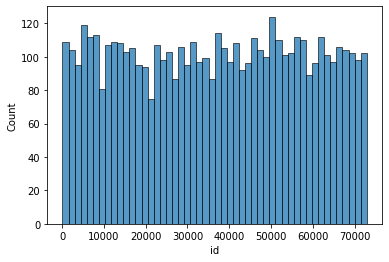

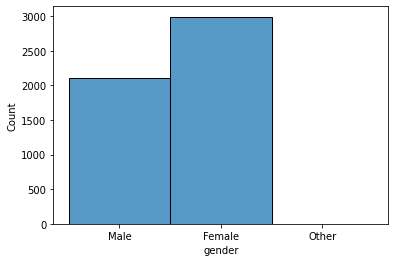

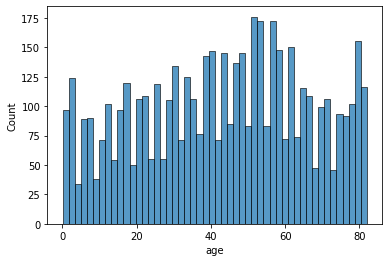

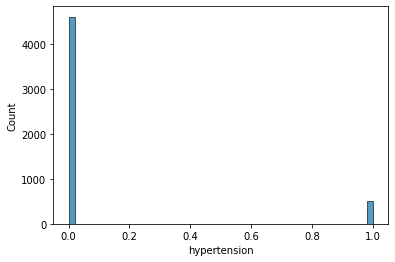

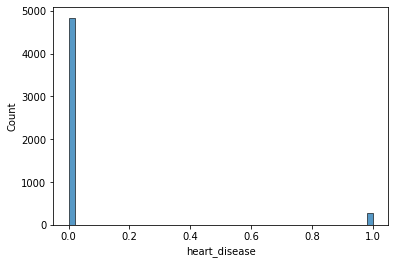

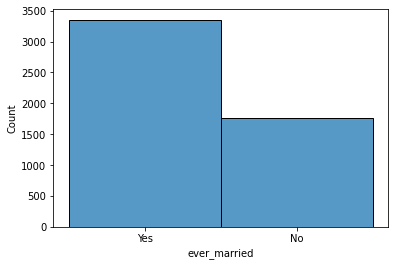

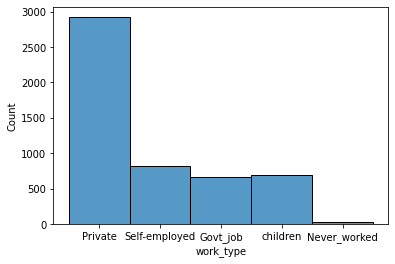

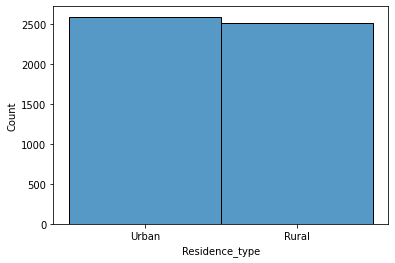

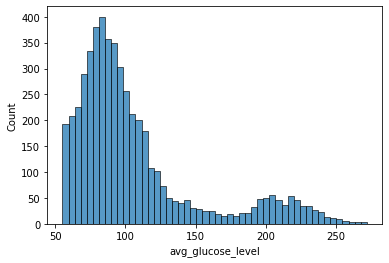

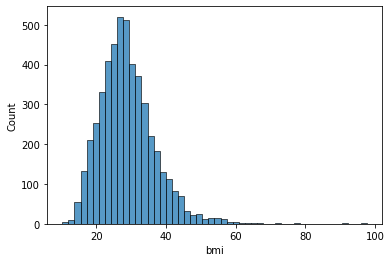

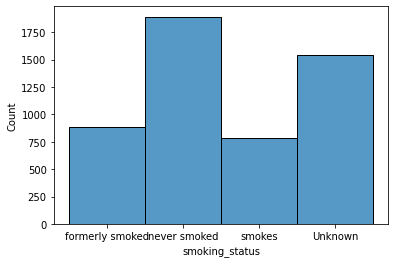

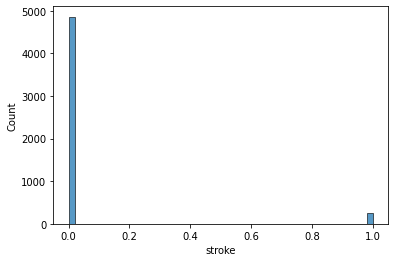

In [195]:
for i, col in enumerate(dataset.columns):
    plt.figure(i)
    sns.histplot(dataset[col],bins=50)

* **Bivariate Analysis :**

**Graphs & Plots** -
- Scatter PLots Scatter plots are used to visualize the relationship between two (or sometimes three) variables in a data set.

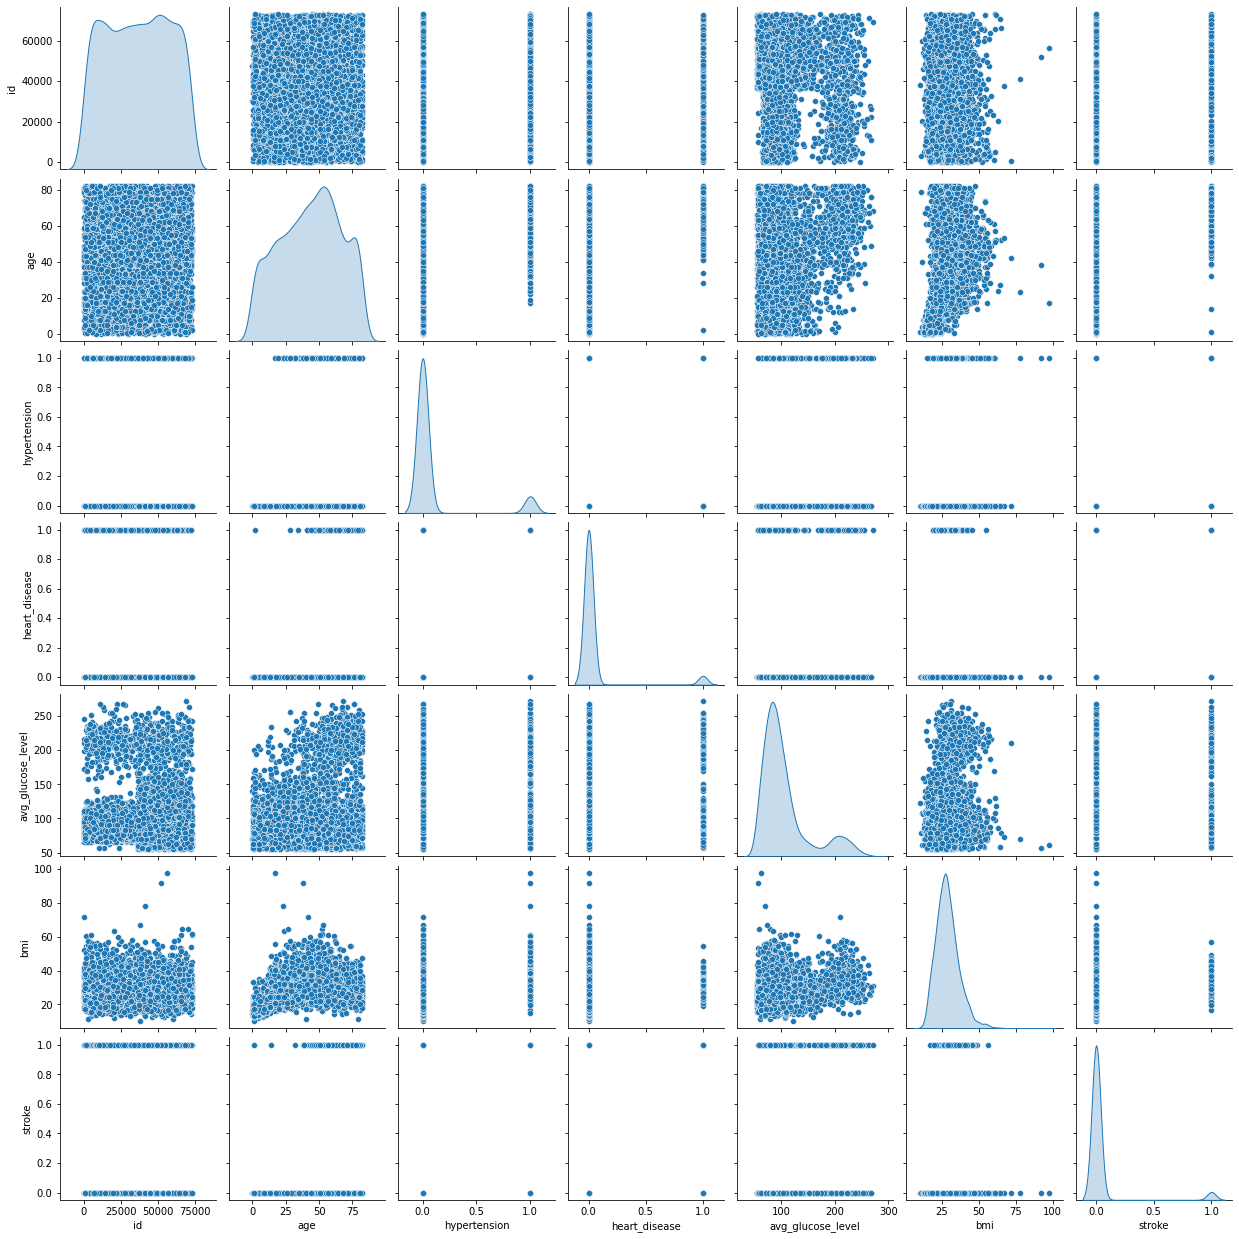

In [196]:
sns.pairplot(dataset, diag_kind='kde')
plt.show()

# **3. DATA PREPROCESSING -**
**3.1. Finding missing values**
- Which independent variables have missing data? How much?


In [197]:
dataset.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Interpretation : We have 201 null values in column "bmi" .

* **3.2 Taking care of missing data**

In [198]:
dataset.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [199]:
dataset['bmi']

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [200]:
dataset[['bmi']]=dataset[['bmi']].replace(np.nan, dataset[['bmi']].mean())

In [201]:
dataset[['bmi']]

,bmi
0,36.600000
1,28.893237
2,32.500000
3,34.400000
4,24.000000
...,...
5105,28.893237
5106,40.000000
5107,30.600000
5108,25.600000


In [202]:
dataset.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Interpretation: The missing values in bmi has been replaced with its mean value since the bmi has a float datatype.

* **3.3 Converting Categorical data to numerical data**

In [203]:
for col in dataset.columns:
    print(col, ': ', len(dataset[col].unique()), 'labels')

id :  5110 labels
gender :  3 labels
age :  104 labels
hypertension :  2 labels
heart_disease :  2 labels
ever_married :  2 labels
work_type :  5 labels
Residence_type :  2 labels
avg_glucose_level :  3979 labels
bmi :  419 labels
smoking_status :  4 labels
stroke :  2 labels


Interpretation : Out of these columns, we need to convert five columns,namely - gender, ever_married, work_type, Residence_type and smoking_status into numerical form of data.


In [204]:
#categorical columns
ccols = dataset[["gender","ever_married","work_type","Residence_type","smoking_status"]]
ccols

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [205]:
for col in ccols.columns:
    print(col, ': ', len(dataset[col].unique()), 'labels')

gender :  3 labels
ever_married :  2 labels
work_type :  5 labels
Residence_type :  2 labels
smoking_status :  4 labels


In [206]:
pd.get_dummies(ccols,drop_first=True).shape

(5110, 11)

* **Interpretation:** 
###### We can see that out of five different variables we can end up with 11 new variables.

1. so, it will create 11 more dummy columns along with the existing columns in the dataset. This becomes our dataset more complicated.
2. Thus, we will encode data manually for variables like- ever_married and Residence_type and perform one-hot encoding on variables like gender,work_type and smoking_status


* **Part A**. Encoding the above mentioned variables as follows -  

1. ever_married:
    No = 0
    Yes = 1

3. Residence_type:
    Rural = 0
    Urban = 1
    
* **Part B**. Identfying the Unique values in the gender, work_type and smoking_status columns followed by performing one hot encoding on the same.

# **PART A**

In [207]:
dataset.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


In [208]:
dataset[['ever_married']] = dataset.ever_married.map({'No':0, 'Yes':1})
dataset[['Residence_type']] = dataset.Residence_type.map({'Rural':0, 'Urban':1})

In [209]:
dataset.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,1,Private,1,186.21,29.000000,formerly smoked,1
6,53882,Male,74.0,1,1,1,Private,0,70.09,27.400000,never smoked,1
7,10434,Female,69.0,0,0,0,Private,1,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,1,Private,0,76.15,28.893237,Unknown,1
9,60491,Female,78.0,0,0,1,Private,1,58.57,24.200000,Unknown,1


* Interpretation: Categorical variables are converted in binary form

# **PART B**

In [210]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [211]:
dataset.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [212]:
enc = OneHotEncoder()                                                                                           # creating instance of one-hot-encoder
enc_df = pd.DataFrame(enc.fit_transform(dataset[['work_type']]).toarray())     
enc_df
enc_df.columns = ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'] 
enc_df.apply(np.int64)
dataset =dataset.join(enc_df)
dataset=dataset.drop(['work_type'],axis=1)
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Private,Self-employed,Govt_job,children,Never_worked
0,9046,Male,67.0,0,1,1,1,228.69,36.600000,formerly smoked,1,0.0,0.0,1.0,0.0,0.0
1,51676,Female,61.0,0,0,1,0,202.21,28.893237,never smoked,1,0.0,0.0,0.0,1.0,0.0
2,31112,Male,80.0,0,1,1,0,105.92,32.500000,never smoked,1,0.0,0.0,1.0,0.0,0.0
3,60182,Female,49.0,0,0,1,1,171.23,34.400000,smokes,1,0.0,0.0,1.0,0.0,0.0
4,1665,Female,79.0,1,0,1,0,174.12,24.000000,never smoked,1,0.0,0.0,0.0,1.0,0.0


In [213]:
dataset.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [214]:
enc = OneHotEncoder()                                                  # creating instance of one-hot-encoder
enc_df = pd.DataFrame(enc.fit_transform(dataset[['gender']]).toarray())     
enc_df
enc_df.columns = ['Male', 'Female', 'Other'] 
enc_df.apply(np.int64)
dataset =dataset.join(enc_df)
dataset=dataset.drop(['gender'],axis=1)
dataset.head()

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Private,Self-employed,Govt_job,children,Never_worked,Male,Female,Other
0,9046,67.0,0,1,1,1,228.69,36.600000,formerly smoked,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,51676,61.0,0,0,1,0,202.21,28.893237,never smoked,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,31112,80.0,0,1,1,0,105.92,32.500000,never smoked,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60182,49.0,0,0,1,1,171.23,34.400000,smokes,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1665,79.0,1,0,1,0,174.12,24.000000,never smoked,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [215]:
dataset.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [216]:
enc_df = pd.DataFrame(enc.fit_transform(dataset[['smoking_status']]).toarray())     
enc_df
enc_df.columns = ['formerly smoked', 'never smoked', 'smokes', 'Unknown'] 
enc_df.apply(np.int64)
dataset =dataset.join(enc_df)
dataset=dataset.drop(['smoking_status'],axis=1)
dataset.head()

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Private,Self-employed,Govt_job,children,Never_worked,Male,Female,Other,formerly smoked,never smoked,smokes,Unknown
0,9046,67.0,0,1,1,1,228.69,36.600000,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,51676,61.0,0,0,1,0,202.21,28.893237,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,31112,80.0,0,1,1,0,105.92,32.500000,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60182,49.0,0,0,1,1,171.23,34.400000,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1665,79.0,1,0,1,0,174.12,24.000000,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


* **Interpretation** - One-hot encoding has been implemented and the newly decoded variable columns have been added to the dataset.The original columns of the respective attributes have been dropped too.

###  **Do the ranges of the predictor variables make sense?**

In [217]:
# Range & Box plot
data_Range = dataset.max()-dataset.min()
data_Range 

id                   72873.00
age                     81.92
hypertension             1.00
heart_disease            1.00
ever_married             1.00
Residence_type           1.00
avg_glucose_level      216.62
bmi                     87.30
stroke                   1.00
Private                  1.00
Self-employed            1.00
Govt_job                 1.00
children                 1.00
Never_worked             1.00
Male                     1.00
Female                   1.00
Other                    1.00
formerly smoked          1.00
never smoked             1.00
smokes                   1.00
Unknown                  1.00
dtype: float64

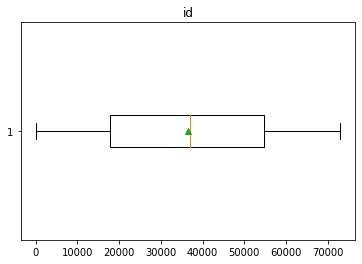

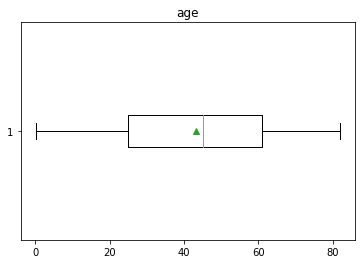

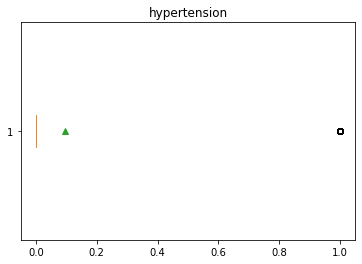

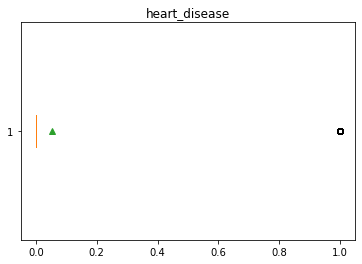

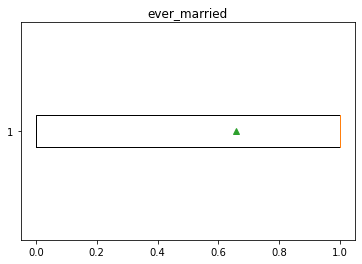

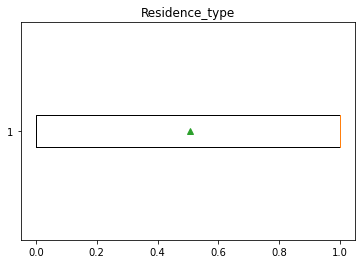

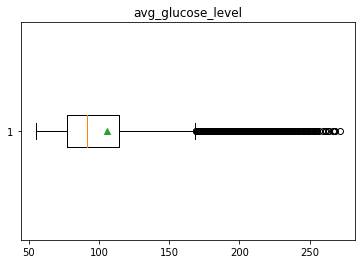

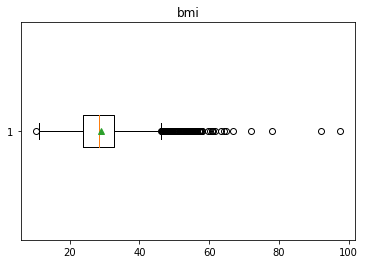

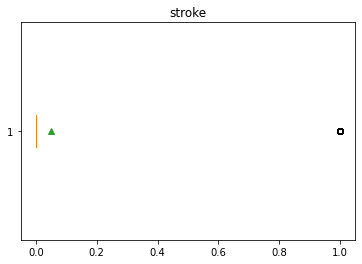

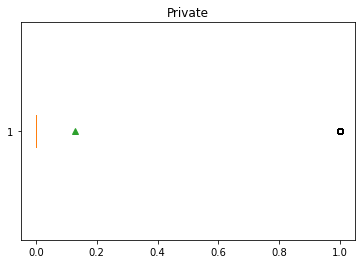

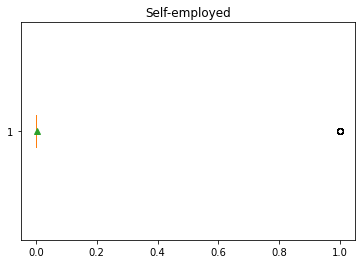

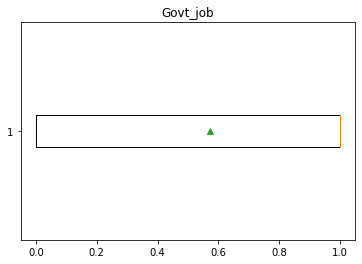

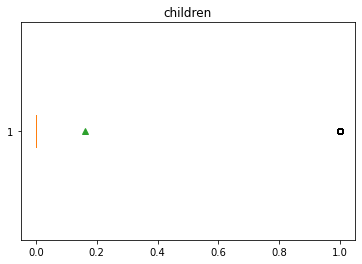

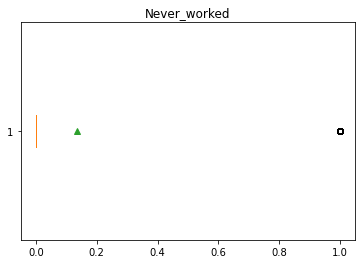

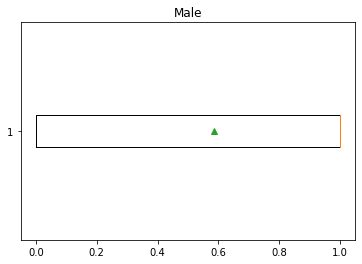

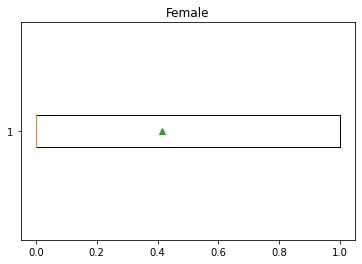

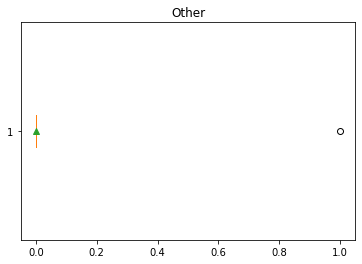

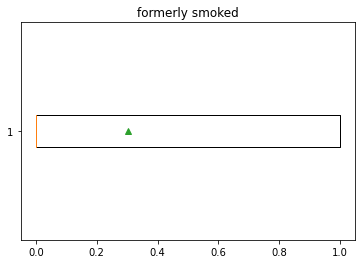

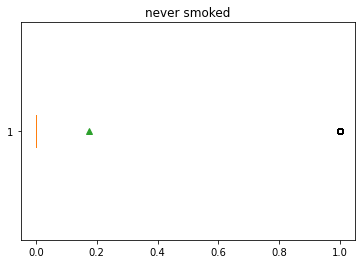

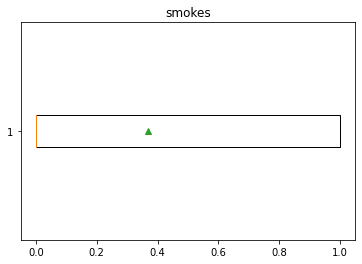

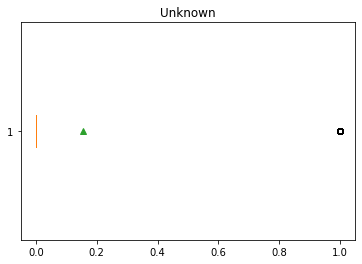

In [218]:
for i, col in enumerate(dataset.columns):
    plt.figure(i)
    plt.title(col)
    plt.boxplot(dataset[col], vert=False, showmeans=True)

* **BOXPLOTS**:

In descriptive statistics, a box plot is a type of chart often used in explanatory data analysis. Box plots visually show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages.

1. When the median is in the middle of the box, and the whiskers are about the same on both sides of the box, then the distribution is symmetric.

2. When the median is closer to the bottom of the box, and if the whisker is shorter on the lower end of the box, then the distribution is positively skewed.

3. When the median is closer to the top of the box, and if the whisker is shorter on the upper end of the box, then the distribution is negatively skewed.

**Interpretation:**
The attributes like smokes, male, female,formerly_smoked, govt_job, residence_type, ever_married, id, age doesnot have outliers.

# **3.4 NORMALIZING THE DATA**

**Why normalizing is required ?**
- Normalization is a technique often applied as part of data preparation for machine learning.
- Normalization avoids these problems by creating new values that maintain the general distribution and ratios in the source data, while keeping values within a scale applied across all numeric columns used in the model.
- The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.



In [219]:
columns = dataset[["id","Other"]]
dataset.drop(columns, inplace=True, axis=1)

* **Interpretation** :Dropping columns like 'id' and 'Other' from dataset for the following reasons -
1. id - ID is a unique key of the dataset and wont act as a driving factor for stroke since it is not related to patient's health information.
2. Other -  Column 'Other' is encoded from column gender and has only 1 value in the dataset.This might make our model biased. 

In [220]:
dataset

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Private,Self-employed,Govt_job,children,Never_worked,Male,Female,formerly smoked,never smoked,smokes,Unknown
0,67.0,0,1,1,1,228.69,36.600000,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,61.0,0,0,1,0,202.21,28.893237,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0,1,1,0,105.92,32.500000,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,49.0,0,0,1,1,171.23,34.400000,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,79.0,1,0,1,0,174.12,24.000000,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,1,83.75,28.893237,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5106,81.0,0,0,1,1,125.20,40.000000,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5107,35.0,0,0,1,0,82.99,30.600000,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,51.0,0,0,1,0,166.29,25.600000,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [221]:
from sklearn import preprocessing
x = dataset[['age','avg_glucose_level','bmi']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataset[['age','avg_glucose_level','bmi']] = pd.DataFrame(x_scaled)

In [222]:
dataset.head(20)

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Private,Self-employed,Govt_job,children,Never_worked,Male,Female,formerly smoked,never smoked,smokes,Unknown
0,0.816895,0,1,1,1,0.801265,0.301260,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.743652,0,0,1,0,0.679023,0.212981,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.975586,0,1,1,0,0.234512,0.254296,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.597168,0,0,1,1,0.536008,0.276060,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.963379,1,0,1,0,0.549349,0.156930,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0.987793,0,0,1,1,0.605161,0.214204,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6,0.902344,1,1,1,0,0.069107,0.195876,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.841309,0,0,0,1,0.181285,0.143184,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,0.719238,0,0,1,0,0.097082,0.212981,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
9,0.951172,0,0,1,1,0.015927,0.159221,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


# **4. Finding correlation between all the features in the data & plotting the heat map**

**Is the predictor variables independent of all the other predictor variables?**


* **4.1. Feature Selection : Features related to the target (dependent variable) "stroke" are -**

In [223]:
aa = dataset.corr()

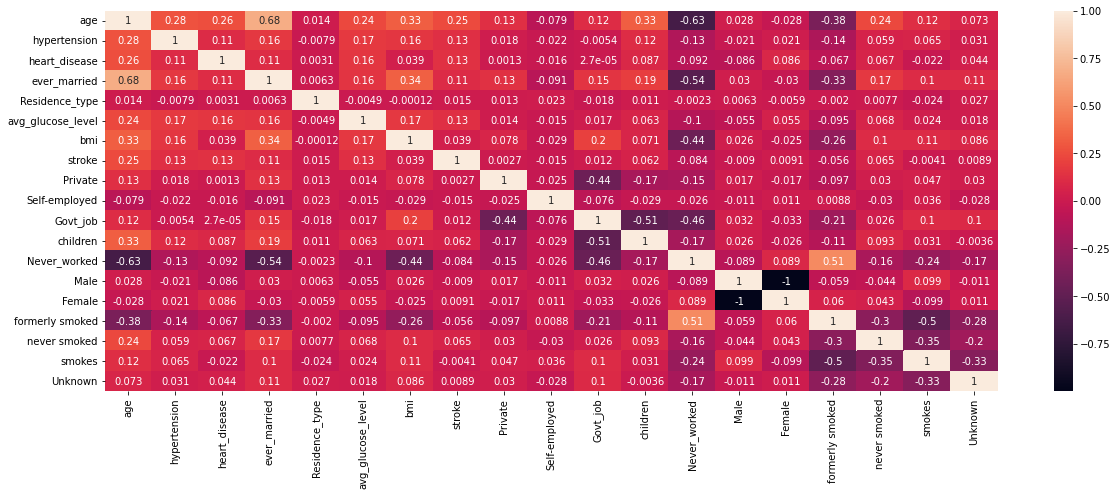

In [224]:
import seaborn as sns
plt.figure(figsize=(20,7))
sns.heatmap(aa, annot=True)

**Interpretation** -
* Heatmap provides us with a visual depiction of the relationship between the variables.

* The correlation coefficient has values between -1 to 1:

1. A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
2. A value closer to 1 implies stronger positive correlation
3. A value closer to -1 implies stronger negative correlation

We will only select features which has the highest correlation with respect to target variable having p-value <= 0.05

Hence, variables satisfying above condition are age, hypertension, heart_disease, ever_married & avg_glucose_level.

To predict a heart stroke, these are the most significant factors and are independent of each other. 


* **4.2 OLS Method to determine the significant variables and the most important variables contributing to predict the stroke**

In [225]:
#Let's sort the numeric correlation between stroke and other features
aa['stroke'].sort_values(ascending=False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
ever_married         0.108340
never smoked         0.064556
children             0.062168
bmi                  0.038947
Residence_type       0.015458
Govt_job             0.011888
Female               0.009117
Unknown              0.008939
Private              0.002677
smokes              -0.004129
Male                -0.009027
Self-employed       -0.014882
formerly smoked     -0.055892
Never_worked        -0.083869
Name: stroke, dtype: float64

In [226]:
dataset.isna().sum()

age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
stroke               0
Private              0
Self-employed        0
Govt_job             0
children             0
Never_worked         0
Male                 0
Female               0
formerly smoked      0
never smoked         0
smokes               0
Unknown              0
dtype: int64

In [227]:
#OLS for finding the p value and t statistics
import statsmodels.api as sm

In [228]:
result = sm.OLS(dataset['stroke'], dataset[['age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type','avg_glucose_level',
       'bmi', 'Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked', 'Male', 'Female', 'formerly smoked', 'Never_worked', 'smokes']]).fit()




In [230]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 stroke   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     31.34
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           1.81e-86
Time:                        01:02:49   Log-Likelihood:                 822.35
No. Observations:                5110   AIC:                            -1613.
Df Residuals:                    5094   BIC:                            -1508.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.2539      0.018     14.444      0.000       0.219       0.288
hypertension          0.0384      0.010      3.730      0.000       0.018       0.059
heart_disease         0.0501      0.013      3.718      0.000       0.024       0.077
ever_married         -0.0347      0.009     -4.048      0.000      -0.051      -0.018
Residence_type        0.0052      0.006      0.902      0.367      -0.006       0.017
avg_glucose_level     0.0652      0.015      4.488      0.000       0.037       0.094
bmi                  -0.0560      0.037     -1.499      0.134      -0.129       0.017
Private              -0.1138      0.207     -0.551      0.582      -0.519       0.291
Self-employed        -0.0766      0.211     -0.363      0.717      -0.491       0.337
Govt_job             -0.0992      0.207     -0.480      0.631      -0.504       0.306
children             -0.1186      0.207     -0.574      0.566      -0.524       0.287
Never_worked         -0.0254      0.103     -0.246      0.806      -0.228       0.177
Male                  0.0262      0.207      0.127      0.899      -0.379       0.431
Female                0.0247      0.207      0.119      0.905      -0.380       0.430
formerly smoked      -0.0002      0.008     -0.028      0.977      -0.017       0.016
Never_worked         -0.0254      0.103     -0.246      0.806      -0.228       0.177
smokes               -0.0075      0.007     -1.067      0.286      -0.021       0.006
==============================================================================
Omnibus:                     3803.912   Durbin-Watson:                   0.172
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47514.720
Skew:                           3.648   Prob(JB):                         0.00
Kurtosis:                      16.036   Cond. No.                     2.21e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.51e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Which predictor variables are the most important?**

**Interpretation:**
* The variables having p-value less than 0.05 are not significant variables. Hence, we will remove variables namely - bmi, Residence_type,children, Male, Female, formerly smoked, smokes, Private, Govt_job, Self-employed and Never_worked. 
* Again running the OLS algorithm.   

In [231]:
result = sm.OLS(dataset['stroke'], dataset[['age', 'heart_disease', 'hypertension', 'ever_married', 'avg_glucose_level']]).fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 stroke   R-squared (uncentered):                   0.112
Model:                            OLS   Adj. R-squared (uncentered):              0.111
Method:                 Least Squares   F-statistic:                              128.4
Date:                Sat, 25 Sep 2021   Prob (F-statistic):                   1.87e-128
Time:                        01:02:51   Log-Likelihood:                          771.76
No. Observations:                5110   AIC:                                     -1534.
Df Residuals:                    5105   BIC:                                     -1501.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.1407      0.013     10.916      0.000       0.115       0.166
heart_disease         0.0726      0.013      5.436      0.000       0.046       0.099
hypertension          0.0482      0.010      4.715      0.000       0.028       0.068
ever_married         -0.0468      0.008     -5.577      0.000      -0.063      -0.030
avg_glucose_level     0.0289      0.014      2.104      0.035       0.002       0.056
==============================================================================
Omnibus:                     4039.276   Durbin-Watson:                   0.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57121.586
Skew:                           3.927   Prob(JB):                         0.00
Kurtosis:                      17.373   Cond. No.                         5.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Which independent variables are useful to predict a target (dependent variable)?*
- The variables useful to predict the target variable 'stroke' are age, hypertension, heart_disease, ever_married & avg_glucose_level


# **5. DATA SPLIT - Train and Test Split**
**Do the training and test sets have the same data?**

Data is split into 2 parts as mentioned below -
1. Taining data set = 80%
2. Test data set = 20%

In [232]:
from sklearn.model_selection import  train_test_split

X = dataset[['age', 'heart_disease', 'hypertension', 'ever_married','avg_glucose_level' ]]

y = dataset['stroke']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)



<function matplotlib.pyplot.show>

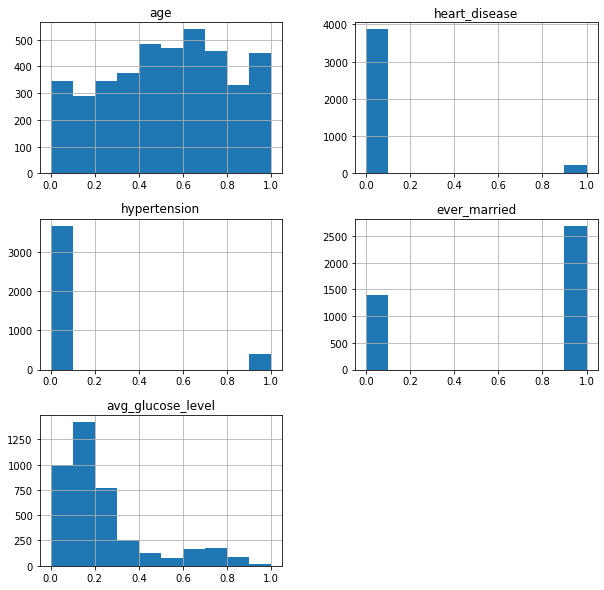

In [233]:
X_train.hist(figsize=(10,10))
plt.show

<function matplotlib.pyplot.show>

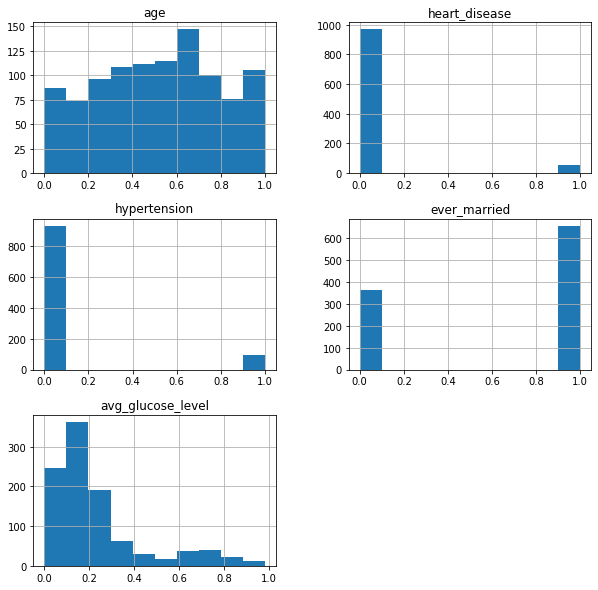

In [234]:
X_test.hist(figsize=(10,10))
plt.show

<function matplotlib.pyplot.show>

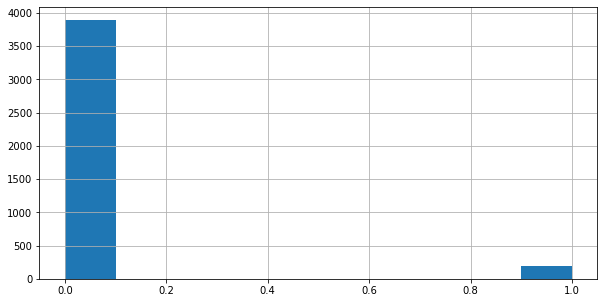

In [235]:
y_train.hist(figsize=(10,5))
plt.show

<function matplotlib.pyplot.show>

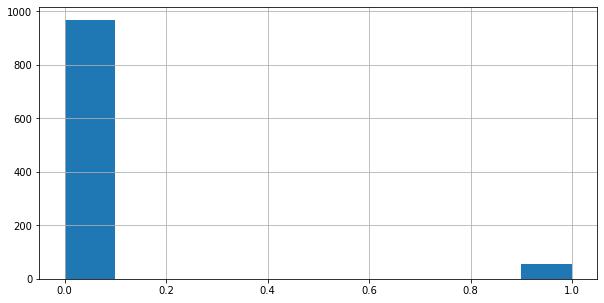

In [236]:
y_test.hist(figsize=(10,5))
plt.show

* Interpretation: 
1. The histogram of the driving factors of the X_train & X_test are in approximate proportion.
2. The histogram of the driving factors of the y_train & y_test are in approximate proportion.


# **6. Conclusion -**

The most significant driving factors to predict whether a person could encounter a stroke or not are age, hypertension, heart_disease, ever_married & avg_glucose_level. 



* **References:**  
1. Scikit learn offcial documentation - https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling
2. Towards Data Science https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
3. https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

The algorithms were referred directly from the Scikit learn official documentation. Normalization, Pearson's correlation and heatmap were referred from towardsdataScience site. Rest of the code was written independently.





Copyright 2021 Nikita Gaurihar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.